In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
case = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/Case.csv')
patientinfo = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/PatientInfo.csv')
patientroute = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/PatientRoute.csv')
time = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/Time.csv')
timeage = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/TimeAge.csv')
timegender = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/TimeGender.csv')
timeprovince = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/TimeProvince.csv')
region = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/Region.csv')
weather = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/Weather.csv')
searchtrend = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/SearchTrend.csv')
seoulfloating = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/SeoulFloating.csv')
policy = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/Policy.csv')

### Data Overview

__01. CASE (확진 케이스)__
- case_id : 케이스 번호
- province : 시/도 정보
- city : 시/군/구 정보
- group : 집단감염 여부(True/False)
- infection_case : 집단감염 장소
- confirmed : 확진자 발생 수
- latitude : 위도
- longitude : 경도

In [4]:
print('Case 크기: ', case.shape)
case.head()

Case 크기:  (112, 8)


,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403


- 2020년 1월 20일부터 4월 29일까지 구로구 콜센터 집단 감염 사례와 같은 주요 확진 Case 112개

In [5]:
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   case_id         112 non-null    int64 
 1   province        112 non-null    object
 2   city            112 non-null    object
 3   group           112 non-null    bool  
 4   infection_case  112 non-null    object
 5   confirmed       112 non-null    int64 
 6   latitude        112 non-null    object
 7   longitude       112 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 6.4+ KB


In [48]:
case.describe()

,case_id,confirmed
count,1.120000e+02,112.000000
mean,3.040183e+06,87.937500
std,2.052266e+06,440.500949
min,1.000001e+06,0.000000
25%,1.200009e+06,5.000000
50%,2.000002e+06,10.000000
75%,5.100002e+06,33.000000
max,7.000003e+06,4510.000000


In [47]:
# 전체 확진자 수
case.confirmed.sum()

9849

In [50]:
# 최다 확진자가 나온 곳은?
case[case['confirmed'] == 4510]

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
20,1200001,Daegu,Nam-gu,True,Shincheonji Church,4510,35.84008,128.5667


- 전체 확진자 중 4,510명(약 45%)가 대구 신천지 교회에서 발생하였다.

In [55]:
# 신천지 교회 확진자는 대구에만 존재할까?
case[case['infection_case'] == 'Shincheonji Church']

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
7,1000008,Seoul,from other city,True,Shincheonji Church,8,-,-
12,1100002,Busan,from other city,True,Shincheonji Church,12,-,-
20,1200001,Daegu,Nam-gu,True,Shincheonji Church,4510,35.84008,128.5667
29,1300001,Gwangju,from other city,True,Shincheonji Church,9,-,-
34,1400002,Incheon,from other city,True,Shincheonji Church,2,-,-
39,1500002,Daejeon,from other city,True,Shincheonji Church,2,-,-
44,1600001,Ulsan,from other city,True,Shincheonji Church,16,-,-
50,1700003,Sejong,from other city,True,Shincheonji Church,1,-,-
57,2000004,Gyeonggi-do,from other city,True,Shincheonji Church,29,-,-
63,3000001,Gangwon-do,from other city,True,Shincheonji Church,17,-,-


- 신천지 교회 확진자가 대구 뿐만 아니라 전국에 존재한다.

In [8]:
# 집단감염 장소 파악
print('집단감염 장소 종류: ', case['infection_case'].nunique())
case['infection_case'].unique()

집단감염 장소 종류:  43


array(['Guro-gu Call Center', 'Dongan Church', 'Manmin Central Church',
       "Eunpyeong St. Mary's Hospital", 'Seongdong-gu APT',
       'Jongno Community Center', 'Jung-gu Fashion Company',
       'Shincheonji Church', 'overseas inflow', 'contact with patient',
       'etc', 'Onchun Church', 'Suyeong-gu Kindergarten',
       'Haeundae-gu Catholic Church', 'Jin-gu Academy',
       'Cheongdo Daenam Hospital', 'Second Mi-Ju Hospital',
       'Hansarang Convalescent Hospital', 'Daesil Convalescent Hospital',
       'Fatima Hospital', 'Korea Forest Engineer Institute',
       'Seosan-si Laboratory', 'Ministry of Oceans and Fisheries',
       'gym facility in Sejong', 'River of Grace Community Church',
       'Uijeongbu St. Mary’s Hospital', 'Bundang Jesaeng Hospital',
       'Suwon Saeng Myeong Saem Church', 'Wonju-si Apartments',
       'Goesan-gun Jangyeon-myeon', 'gym facility in Cheonan',
       'Bonghwa Pureun Nursing Home', 'Pilgrimage to Israel',
       'Milal Shelter', 'Gyeongsan

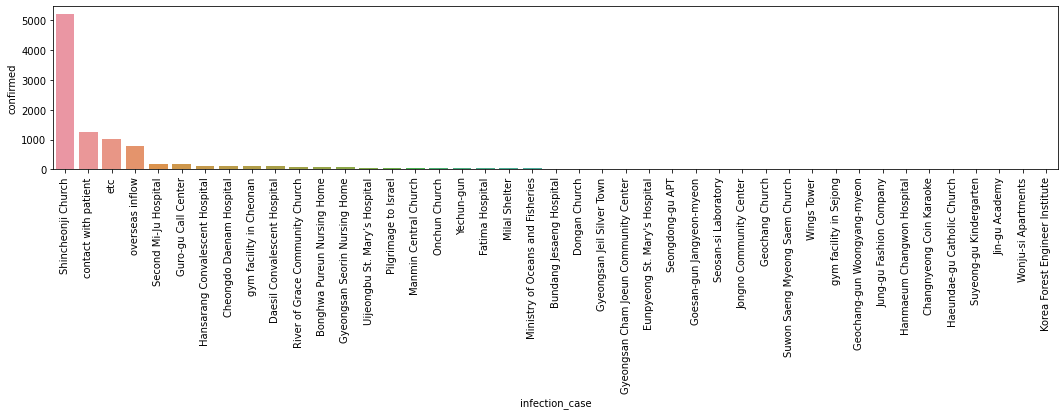

In [69]:
# 집단감염 장소 확진자 수 시각화
fig = plt.gcf()
fig.set_size_inches(18,3)
case_g = case.groupby(['infection_case'], as_index=False)['confirmed'].sum().sort_values(by='confirmed', ascending=False)
g = sns.barplot(x='infection_case', y='confirmed', data=province_g)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

- 신천지교회 확진자 수가 압도적으로 많다.
- group(True/False)에 따른 감염장소를 구분해볼 필요가 있다.

In [73]:
# 집단감염이 아닌 감염경로(False)의 확진자수 시각화
group_f = case[case['group'] == False]
print('집단감염이 아닌 경우 감염경로 종류:', group_f['infection_case'].nunique())
group_f['infection_case'].unique()

집단감염이 아닌 경우 감염경로 종류: 3


array(['overseas inflow', 'contact with patient', 'etc'], dtype=object)

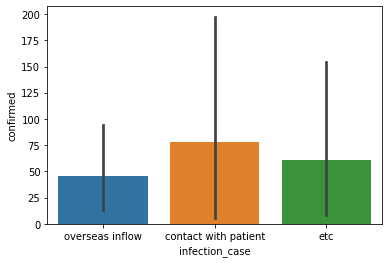

In [ ]:
sns.barplot(x='infection_case', y='confirmed', data=group_f) # pie chart로 다시 그리기

- 확진자 수는 기 확진자와의 접촉, 기타, 해외 유입 순이다.

In [ ]:
# 결측치 확인
case.isnull().sum()

case_id           0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

- Null값은 없다고 나오지만 city, latitude, longitude 컬럼에 - 값으로 존재한다고 볼 수 있다. 이는 해당 province 전체의 해외유입, 확진자 접촉, 기타 등의 전체 sum 값이라 어떻게 처리하면 좋을지 고민이 필요하다.

__02. Patient Info (환자정보)__
- patient_id : 환자ID
- global_num : 질병관리청에서 부여한 확진자 번호
- sex : 성별
- birt_year : 출생연도
- age : 연령대
- province : 거주지(시/도)
- city : 거주지(시/군/구)
- disease : 
- infection_case : 감염경로
- infection_order : N
- infected_by : 해당 환자를 감염시킨 환자ID
- contact_number : 접촉자수
- symptom_onset_date : 증상발현일
- confirmed_date : 확진일
- released_date : 퇴원일
- deceased_date : 사망일
- state : 상태(사망/퇴원 등)

In [ ]:
print('Patient Info 크기: ', patientinfo.shape)
patientinfo.head()

Patient Info 크기:  (3388, 18)


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


- 3,388명의 확진자 정보(성별, 출생연도, 연령대, 국적 등)

In [ ]:
patientinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3388 non-null   int64  
 1   global_num          2276 non-null   float64
 2   sex                 3311 non-null   object 
 3   birth_year          2927 non-null   float64
 4   age                 3304 non-null   object 
 5   country             3388 non-null   object 
 6   province            3388 non-null   object 
 7   city                3309 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2620 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         822 non-null    float64
 12  contact_number      643 non-null    float64
 13  symptom_onset_date  481 non-null    object 
 14  confirmed_date      3385 non-null   object 
 15  released_date       1327 non-null   object 
 16  deceas

In [ ]:
patientinfo.describe()

,patient_id,global_num,birth_year,infection_order,infected_by,contact_number
count,3.388000e+03,2276.000000,2927.000000,31.000000,8.220000e+02,643.000000
mean,3.498439e+09,6737.086555,1975.068329,2.387097,2.667213e+09,18.129082
std,2.201996e+09,3333.136141,20.275295,1.453213,1.741377e+09,73.730420
min,1.000000e+09,1.000000,1916.000000,1.000000,1.000000e+09,0.000000
25%,1.300000e+09,4270.000000,1961.000000,1.000000,1.200000e+09,2.000000
50%,2.000001e+09,7933.000000,1975.000000,2.000000,2.000000e+09,4.000000
75%,6.001001e+09,9516.750000,1993.000000,3.000000,4.100000e+09,13.000000
max,7.000000e+09,10758.000000,2020.000000,6.000000,7.000000e+09,1160.000000


- 최고령 확진자는 1916년생, 최연소 확진자는 2020년생(신생아)이다.
- 접촉자수가 1,160명인 case가 눈에 띈다.

In [42]:
patientinfo.describe(include=object)

,sex,age,country,province,city,disease,infection_case,symptom_onset_date,state
count,3311,3304,3388,3388,3309,18,2620,481,3388
unique,2,11,12,17,154,1,23,73,3
top,female,20s,Korea,Gyeongsangbuk-do,Gyeongsan-si,True,contact with patient,2020-02-27,released
freq,1856,802,3361,1230,632,18,968,29,1886


In [41]:
# 외국인도 존재한다.
patientinfo.groupby(['country'])['patient_id'].count().sort_values(ascending=False)

country
Korea            3361
China              11
United States       6
Thailand            2
Vietnam             1
Switzerland         1
Spain               1
Mongolia            1
Indonesia           1
Germany             1
France              1
Canada              1
Name: patient_id, dtype: int64

In [32]:
patientinfo['confirmed_date'] = pd.to_datetime(patientinfo['confirmed_date'])
patientinfo['released_date'] = pd.to_datetime(patientinfo['released_date'])
patientinfo['deceased_date'] = pd.to_datetime(patientinfo['deceased_date'])

In [36]:
patientinfo['released_duration'] = patientinfo['released_date'] - patientinfo['confirmed_date']

In [10]:
print('감염장소 종류 : ', patientinfo['infection_case'].nunique())
patientinfo['infection_case'].unique()

감염장소 종류 :  23


array(['overseas inflow', 'contact with patient', 'Seongdong-gu APT',
       'etc', "Eunpyeong St. Mary's Hospital", 'Shincheonji Church',
       'Dongan Church', 'Guro-gu Call Center', 'Onchun Church',
       'Cheongdo Daenam Hospital', 'Suyeong-gu Kindergarten', nan,
       'Ministry of Oceans and Fisheries', 'gym facility in Cheonan',
       'gym facility in Sejong', 'River of Grace Community Church',
       'Gyeongsan Seorin Nursing Home',
       'Gyeongsan Cham Joeun Community Center',
       'Gyeongsan Jeil Silver Town', 'Bonghwa Pureun Nursing Home',
       'Pilgrimage to Israel', 'Milal Shelter', 'Geochang Church',
       'Changnyeong Coin Karaoke'], dtype=object)

Text(0.5, 1.0, 'Confirmed cases')

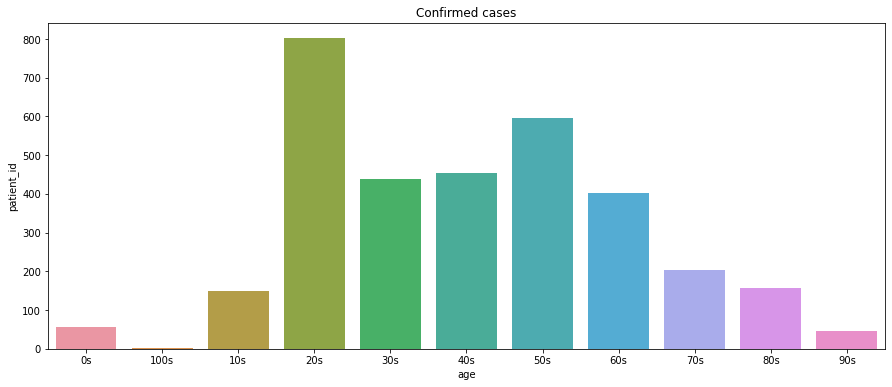

In [28]:
f,ax = plt.subplots(1,1, figsize=(15,6))
g = patientinfo.groupby(['age'], as_index=False)['patient_id'].count()
sns.barplot(x='age', y='patient_id', data=g)
ax.set_title('Confirmed cases')

In [16]:
patientinfo[patientinfo['age'] == '100s']  # only one 

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
2531,6001000503,7739.0,female,1916.0,100s,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,Gyeongsan Seorin Nursing Home,NaN,NaN,NaN,NaN,2020-03-10,NaN,NaN,isolated


In [17]:
patientinfo[patientinfo['contact_number'] == 1160.0]  # 31번 확진자 from 신천지(aka.슈퍼 전파자)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
767,1200000031,31.0,female,1959.0,60s,Korea,Daegu,NaN,NaN,Shincheonji Church,NaN,NaN,1160.0,NaN,2020-02-18,NaN,NaN,isolated


In [19]:
patientinfo['disease'].unique()

array([nan, True], dtype=object)

In [20]:
patientinfo[patientinfo['disease'] == True]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
772,1200000038,38.0,female,1963.0,50s,Korea,Daegu,Nam-gu,True,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaN,2020-02-23,deceased
815,1200001288,1288.0,male,1955.0,60s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-02-27,NaN,2020-03-02,deceased
817,1200001921,1921.0,male,1953.0,60s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-02-28,NaN,2020-03-05,deceased
818,1200002085,2085.0,male,1949.0,70s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-02-28,NaN,2020-03-04,deceased
820,1200002614,2614.0,female,1943.0,70s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-02-29,NaN,2020-03-01,deceased
825,1200003896,3896.0,male,1933.0,80s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,2020-03-03,deceased
826,1200003914,3914.0,male,1938.0,80s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,2020-03-09,deceased
827,1200004046,4046.0,female,1962.0,50s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,2020-03-01,deceased
828,1200005767,5767.0,male,1938.0,80s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,2020-03-05,deceased
829,1200007196,7196.0,male,1945.0,70s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-03-08,NaN,2020-03-09,deceased


disease 컬럼이 True인 사람들의 시사점?

In [18]:
# 결측치 확인
patientinfo.isnull().sum()

patient_id               0
global_num            1112
sex                     77
birth_year             461
age                     84
country                  0
province                 0
city                    79
disease               3370
infection_case         768
infection_order       3357
infected_by           2566
contact_number        2745
symptom_onset_date    2907
confirmed_date           3
released_date         2061
deceased_date         3326
state                    0
dtype: int64

- __Observation__
  - birth_year(출생연도)는 결측치가 많기 때문에 유사한 age(연령대) 정보를 사용하는 것이 적합할 것 같다.
  - infection_order(N차 감염?), contact_number(접촉자수), infected_by(해당 환자를 감염시킨 사람의 환자 ID), symptom_onset_date(증상발현일)  같이 결측치가 많은 데이터는 활용하기가 어려워 보인다. (질병 발생 초반 역학조사 단계 정도에서만 유의미한 데이터로 생각된다.)
  - 연령대별 입원일(퇴원일-확진일), 평균 생존기간(사망일-확진일) 시각화
  - disease=Ture 인 사람과 아닌 사람의 입원기간, 사망율 등을 eda

__03. Patient Route (환자동선)__
- 2020년 1월 20일부터 4월 27일까지 확진자들의 이동동선 정보가 담겨있는 테이블이다.

In [21]:
print('Patient Route 크기: ', patientroute.shape)
patientroute.head()

Patient Route 크기:  (6714, 8)


,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534


In [22]:
patientroute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  6714 non-null   int64  
 1   global_num  3571 non-null   float64
 2   date        6714 non-null   object 
 3   province    6714 non-null   object 
 4   city        6714 non-null   object 
 5   type        6714 non-null   object 
 6   latitude    6714 non-null   float64
 7   longitude   6714 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 419.8+ KB


In [23]:
patientroute['type'].value_counts()

etc                            2049
hospital                       1927
store                           641
restaurant                      528
public_transportation           462
airport                         237
pharmacy                        230
church                          148
cafe                            102
pc_cafe                          80
school                           58
lodging                          45
bank                             32
bakery                           26
gym                              20
real_estate_agency               19
beauty_salon                     19
post_office                      17
university                       14
administrative_area_level_1      14
bar                              13
gas_station                      12
academy                          11
karaoke                          10
Name: type, dtype: int64

- __Observation__
  - 환자 이동동선 중 어떤 방문장소가 많은가? (병원??)
  - 환자별 이동동선(위도,경도) 거리를 계산해서 어떤 환자가 가장 이동거리가 많았는지, 다시 말해 전국적 확산에 영향을 미칠 수 있었던 환자가 누구인지 예측

__04. Time (시간)__
- 2020년 1월 20일부터 2020년 4월 30일까지 일자별 누적 검사자수/검사결과/퇴원인원(음성/양성)/사망인원

In [24]:
print('Time 크기: ', time.shape)
time.head()

Time 크기:  (102, 7)


,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [ ]:
time.describe()  # 누적 데이터이기 때문에 max 값이 최종 누적 수치이다.

,time,test,negative,confirmed,released,deceased
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,6.588235,243168.882353,226145.235294,5592.107843,2793.382353,90.205882
std,7.913334,224360.813994,216406.204594,4593.929759,3402.693790,93.342586
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,7365.000000,6796.250000,28.000000,7.500000,0.000000
50%,0.000000,216269.500000,190139.500000,7634.000000,267.500000,57.000000
75%,16.000000,459682.750000,429751.750000,10216.750000,6428.500000,181.500000
max,16.000000,619881.000000,600482.000000,10765.000000,9059.000000,247.000000


In [ ]:
# 최초 확진자 발생일
time[time['confirmed'] == 1]

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0


In [ ]:
# 확진자 최초 퇴원일
time[time['released'] == 1]

,date,time,test,negative,confirmed,released,deceased
16,2020-02-05,16,714,522,18,1,0


In [ ]:
# 최초 사망자 발생일
time[time['deceased'] == 1]

,date,time,test,negative,confirmed,released,deceased
31,2020-02-20,16,13202,11238,104,16,1


In [ ]:
# 일자별 검사자수/확진자수/완치자수(퇴원)/사망자수

In [ ]:
time.isnull().sum()

date         0
time         0
test         0
negative     0
confirmed    0
released     0
deceased     0
dtype: int64

- __Observation__
  - 3.1부 시간 기준이 16시에서 00시로 변경 되었으나, 일자별 데이터이기 때문에 time 컬럼 자체는 불필요해 drop 해도 무방할 것 같다. 
  - 2020년 2월 5일에 최초 퇴원자가 나왔으며, 2020년 2월 20일에 최초 사망자가 발생하였다.
  - 전처리를 통해 일자별 검사자수/검사결과 등을 확인 해볼 수 있다.

__05. Time Age (연령대별 확진/사망자수 추이)__
- 2020년 3월 2일부터 4월 30일까지(60일간) 연령대별 확진/사망자 수

In [ ]:
print('Time Age 크기: ', timeage.shape)
timeage.head()

Time Age 크기:  (540, 5)


,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [ ]:
timeage.isnull().sum()

date         0
time         0
age          0
confirmed    0
deceased     0
dtype: int64

In [ ]:
timeage.groupby(['age'])['confirmed', 'deceased'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,confirmed,deceased
age,,
0s,6404,0
10s,29183,0
20s,153249,0
30s,58621,72
40s,75018,112
50s,103480,622
60s,69622,1381
70s,35957,2764
80s,22981,4146


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


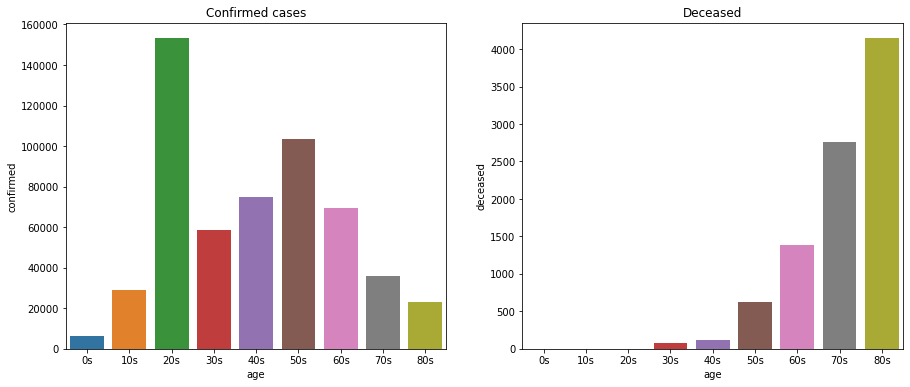

In [ ]:
patient_age = timeage.groupby(['age'], as_index=False)['confirmed', 'deceased'].sum()

f,ax = plt.subplots(1,2, figsize=(15,6))
sns.barplot(x='age', y='confirmed', data=patient_age, ax=ax[0])
ax[0].set_title('Confirmed cases')

sns.barplot(x='age', y='deceased', data=patient_age, ax=ax[1])
ax[1].set_title('Deceased')

plt.show()

In [ ]:
timeage.groupby(['date', 'age'])['confirmed', 'deceased'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


confirmed  deceased
date       age                     
2020-03-02 0s          32         0
           10s        169         0
           20s       1235         0
           30s        506         1
           40s        633         1
...                   ...       ...
2020-04-30 40s       1427         3
           50s       1956        15
           60s       1348        35
           70s        709        74
           80s        485       118

[540 rows x 2 columns]

- __Observation__
  
  - 확진자의 연령대를 살펴보면 20대가 가장 많으며 그 뒤로는 50대, 40대, 60대 순이다.
  - 사망자는 80대, 70대, 60대 순으로 나이가 많을 수록 사망자가 많은 것으로 보아 일반적인 질병과 마잔가지로 기저질병, 면역력 등과 관계가 있어 보인다.
  - __일자별/연령대별 확진자/사망자 추이 시각화__
  - __연령별 확진/사망 비중 컬럼 추가__

__06. Time Gender (성별 확진/사망자수 추이)__
- 2020년 3월 2일부터 4월 30일까지(60일간) 누적 성별 확진자/사망자 수

In [ ]:
print('Time Province 크기: ', timegender.shape)
timegender.head()

Time Province 크기:  (120, 5)


,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


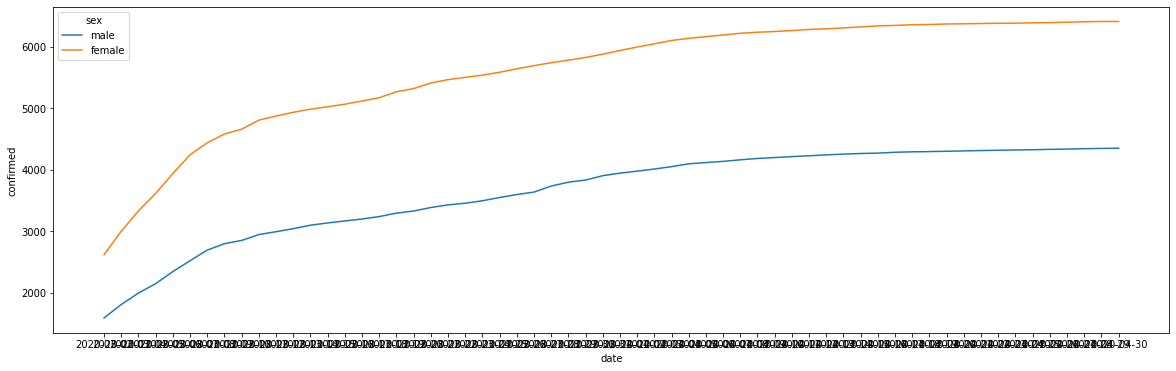

In [ ]:
f,ax = plt.subplots(1,1, figsize=(20,6))
sns.lineplot(x='date', y='confirmed', hue='sex', data=timegender)
plt.show()

그래프가 예쁘지 않으므로 주차별로 전처리가 필요해보인다.

- __Observation__
  -  정보이다.

__07. Time Province (지역별 확진/퇴원/사망자수 추이)__
- 2020년 1월 20일부터 4월 30일까지의 지역별 누적 확진/퇴원/사망자 수

In [ ]:
print('Time Province 크기: ', timeprovince.shape)
timeprovince.head()

Time Province 크기:  (1734, 6)


,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [ ]:
timeprovince.tail()

,date,time,province,confirmed,released,deceased
1729,2020-04-30,0,Jeollabuk-do,18,11,0
1730,2020-04-30,0,Jeollanam-do,15,11,0
1731,2020-04-30,0,Gyeongsangbuk-do,1365,1147,52
1732,2020-04-30,0,Gyeongsangnam-do,117,97,0
1733,2020-04-30,0,Jeju-do,13,8,0


In [ ]:
print('지역 개수:', timeprovince['province'].nunique())
timeprovince['province'].unique()

지역 개수: 17


array(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

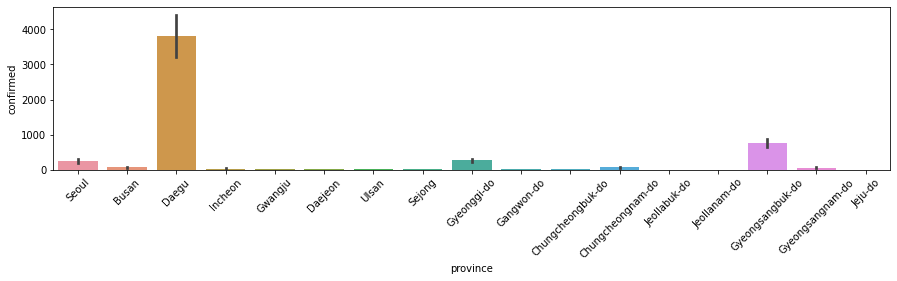

In [ ]:
# 지역별 누적 확진자 수
fig = plt.gcf()
fig.set_size_inches(15,3)
province_confirmed1 = sns.barplot(x='province', y='confirmed', data=timeprovince)
province_confirmed1.set_xticklabels(province_confirmed1.get_xticklabels(), rotation=45)

plt.show()

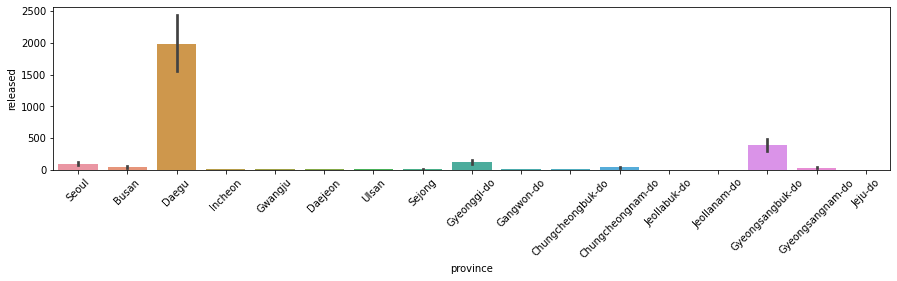

In [ ]:
# 지역별 누적 퇴원자 수
fig = plt.gcf()
fig.set_size_inches(15,3)
province_confirmed = sns.barplot(x='province', y='released', data=timeprovince)
province_confirmed.set_xticklabels(province_confirmed.get_xticklabels(), rotation=45)
plt.show()

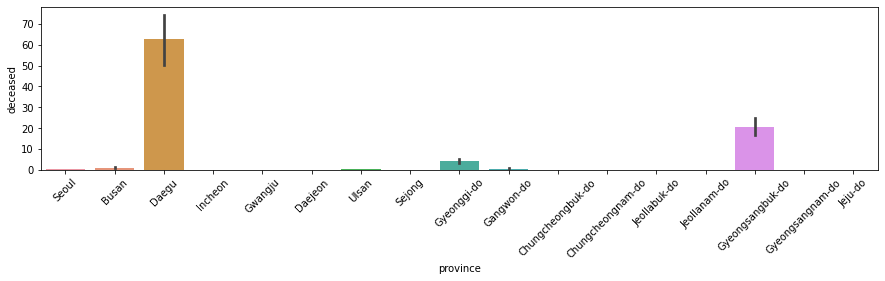

In [ ]:
# 지역별 누적 사망자 수
fig = plt.gcf()
fig.set_size_inches(15,3)
province_confirmed = sns.barplot(x='province', y='deceased', data=timeprovince)
province_confirmed.set_xticklabels(province_confirmed.get_xticklabels(), rotation=45)
plt.show()

- __Obeservation__
  - 해당 기간(코로나 1차 대유행) 대규모 집단 감염이 대구/경북 지역을 중심으로 이뤄졌음을 알 수 있다.
  - 지역별/일자별 확진자수 시각화

__08. Region (지역정보)__
- 지역별 초등학교, 유치원, 대학교, 요양기관 숫자 현황
- 지역별 학원, 노인인구, 독거노인 비율 

In [ ]:
print('Region 크기: ', region.shape)
region.head(100)

Region 크기:  (244, 12)


,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
...,...,...,...,...,...,...,...,...,...,...,...,...
95,20130,Gyeonggi-do,Suwon-si,37.263376,127.028613,99,192,4,1.72,10.50,4.5,2082
96,20140,Gyeonggi-do,Siheung-si,37.380110,126.803009,46,74,2,1.55,8.86,3.8,622
97,20150,Gyeonggi-do,Ansan-si,37.321863,126.830920,54,94,4,1.49,10.35,4.6,1024
98,20160,Gyeonggi-do,Anseong-si,37.008008,127.279763,35,51,3,1.27,16.95,7.2,271


In [ ]:
region.describe()

,code,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32912.090164,36.396996,127.661401,74.180328,107.901639,4.151639,1.294754,20.923730,10.644672,1159.258197
std,19373.349736,1.060304,0.904781,402.713482,588.788320,22.513041,0.592898,8.087428,5.604886,6384.185085
min,10000.000000,33.488936,126.263554,4.000000,4.000000,0.000000,0.190000,7.690000,3.300000,11.000000
25%,14027.500000,35.405263,126.927663,14.750000,16.000000,0.000000,0.870000,14.117500,6.100000,111.000000
50%,30075.000000,36.386601,127.384250,22.000000,31.000000,1.000000,1.270000,18.530000,8.750000,300.000000
75%,51062.500000,37.466119,128.473953,36.250000,55.250000,3.000000,1.612500,27.262500,14.625000,694.500000
max,80000.000000,38.380571,130.905883,6087.000000,8837.000000,340.000000,4.180000,40.260000,24.700000,94865.000000


In [ ]:
region.groupby(['province'])['elementary_school_count', 'kindergarten_count', 'university_count', 'nursing_home_count'].sum().sort_values(by='elementary_school_count', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,elementary_school_count,kindergarten_count,university_count,nursing_home_count
province,,,,
Korea,6087,8837,340,94865
Gyeonggi-do,2554,4474,122,40982
Seoul,1214,1660,96,45478
Gyeongsangnam-do,1002,1372,42,10728
Gyeongsangbuk-do,942,1414,66,8948
Jeollanam-do,858,1084,38,6778
Jeollabuk-do,838,1038,38,7548
Chungcheongnam-do,818,998,42,7282
Gangwon-do,698,736,36,5038


In [ ]:
region.groupby(['province'])['academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,academy_ratio,elderly_population_ratio,elderly_alone_ratio
province,,,
Busan,1.327647,19.357647,9.094118
Chungcheongbuk-do,1.023333,23.192500,11.825000
Chungcheongnam-do,1.122500,23.844375,11.706250
Daegu,1.713333,17.031111,7.966667
Daejeon,1.425000,14.376667,6.200000
Gangwon-do,1.116842,22.890526,11.578947
Gwangju,2.473333,14.815000,6.716667
Gyeonggi-do,1.420625,14.429688,6.084375
Gyeongsangbuk-do,0.948750,27.556250,15.133333


- __Observation__


__09. Weather (날씨 정보)__
  - 2016년 1월 1일부터 2020년 4월 29일까지 총 25,295개의 지역별 날씨 관련 데이터

In [ ]:
print('Weather 크기: ', weather.shape)
weather.head()

Weather 크기:  (25295, 10)


,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25295 entries, 0 to 25294
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   code                   25295 non-null  int64  
 1   province               25295 non-null  object 
 2   date                   25295 non-null  object 
 3   avg_temp               25280 non-null  float64
 4   min_temp               25290 non-null  float64
 5   max_temp               25292 non-null  float64
 6   precipitation          25295 non-null  float64
 7   max_wind_speed         25286 non-null  float64
 8   most_wind_direction    25266 non-null  float64
 9   avg_relative_humidity  25275 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 1.9+ MB


In [ ]:
# 결측치 확인
weather.isnull().sum()

code                      0
province                  0
date                      0
avg_temp                 15
min_temp                  5
max_temp                  3
precipitation             0
max_wind_speed            9
most_wind_direction      29
avg_relative_humidity    20
dtype: int64

- __Observation__


__10. Search Trend (검색 트렌드)__
- 2016년 1월 1일부터 2020년 4월 29일까지 감기/독감/폐렴/코로나 바이러스에 대한 검색 트렌드 정보

In [ ]:
print('Search Trend 크기: ', searchtrend.shape)
searchtrend.head()

Search Trend 크기:  (1581, 5)


,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


In [ ]:
df = searchtrend.set_index('date')
df

,cold,flu,pneumonia,coronavirus
date,,,,
2016-01-01,0.11663,0.05590,0.15726,0.00736
2016-01-02,0.13372,0.17135,0.20826,0.00890
2016-01-03,0.14917,0.22317,0.19326,0.00845
2016-01-04,0.17463,0.18626,0.29008,0.01145
2016-01-05,0.17226,0.15072,0.24562,0.01381
...,...,...,...,...
2020-04-25,0.12781,0.02709,0.08672,4.13405
2020-04-26,0.13363,0.03263,0.08136,3.95342
2020-04-27,0.11226,0.04427,0.10390,4.11033


,cold,flu,pneumonia,coronavirus
date,,,,
2020-01-01,0.14454,0.48434,0.44880,0.01699
2020-01-02,0.19508,0.85751,0.36471,0.01827
2020-01-03,0.19581,0.80443,0.46598,0.02845
2020-01-04,0.60343,0.86961,0.49571,0.02136
2020-01-05,0.20081,0.84152,0.41644,0.01927
...,...,...,...,...
2020-04-25,0.12781,0.02709,0.08672,4.13405
2020-04-26,0.13363,0.03263,0.08136,3.95342
2020-04-27,0.11226,0.04427,0.10390,4.11033


- __Observation__

__11. Seoul Floating__
- 2020년 1월 1일부터 2월 29일까지 서울의 시간대별(00시 ~ 23시), 연령별(20대~70대), 성별, 지역구별 유동인구 정보

In [ ]:
print('Seoul Floating 크기: ', seoulfloating.shape)
seoulfloating.head()

Seoul Floating 크기:  (432000, 7)


,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [ ]:
seoulfloating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432000 entries, 0 to 431999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        432000 non-null  object
 1   hour        432000 non-null  int64 
 2   birth_year  432000 non-null  int64 
 3   sex         432000 non-null  object
 4   province    432000 non-null  object
 5   city        432000 non-null  object
 6   fp_num      432000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 23.1+ MB


- __Observation__

__12. Policy__
- 48개의 코로나 관련 정부 정책 정보이다.

In [ ]:
print('Policy 크기: ', policy.shape)
policy.head()

Policy 크기:  (48, 7)


,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [ ]:
policy['type'].value_counts()

Immigration    15
Education      11
Health          9
Technology      5
Alert           4
Social          4
Name: type, dtype: int64

- __Observation__

  - 감염병 경보 레벨 관찰하기